**Connect to google drive**


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
titanic='/content/gdrive/MyDrive/Colab Notebooks/Titanic.csv'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **Vectors, Matrices and Arrays**



**Problem 1** 
You need to create a vector

**Solution**
Use NumPy to create a one-dimensional array:


In [ ]:
# Load library
import numpy as np
# Create a vector as a row
vector_row = np.array([1, 2, 3])
# Create a vector as a column
vector_column = np.array([[1],
 [2],
[3]])

**Problem 2:**
You need to create a matrix.

**Solution**
Use NumPy to create a two-dimensional array:

In [ ]:
# Load library
import numpy as np
# Create a matrix
matrix = np.array([[1, 2],
 [1, 2],
 [1, 2]])


In [ ]:
#the matrix data structure is not recommended for two reasons. First, arrays
#are the de facto standard data structure of NumPy. Second, the vast majority of
#NumPy operations return arrays, not matrix objects.

matrix_object = np.mat([[1, 2],
 [1, 2],
 [1, 2]])

**Problem 3:**
Given data with very few nonzero values, you want to efficiently represent it.

**Solution:**
Create a sparse matrix:

In [ ]:
# Load libraries
import numpy as np
from scipy import sparse
# Create a matrix
matrix = np.array([[0, 0],
 [0, 1],
 [3, 0]])
# Create compressed sparse row (CSR) matrix
matrix_sparse = sparse.csr_matrix(matrix)

# View sparse matrix
print(matrix_sparse)

  (1, 1)	1
  (2, 0)	3


**Discussion**
A frequent situation in machine learning is having a huge amount of data; however,
most of the elements in the data are zeros. For example, imagine a matrix where the
columns are every movie on Netflix, the rows are every Netflix user, and the values
are how many times a user has watched that particular movie. This matrix would
have tens of thousands of columns and millions of rows! However, since most users
do not watch most movies, the vast majority of elements would be zero.
Sparse matrices only store nonzero elements and assume all other values will be zero,
leading to significant computational savings. In our solution, we created a NumPy
array with two nonzero values, then converted it into a sparse matrix. 

There are a number of types of sparse matrices. However, in compressed sparse row
(CSR) matrices, (1, 1) and (2, 0) represent the (zero-indexed) indices of the nonzero values 1 and 3, respectively. For example, the element 1 is in the second row and
second column. We can see the advantage of sparse matrices if we create a much
larger matrix with many more zero elements and then compare this larger matrix
with our original sparse matrix:

As we can see, despite the fact that we added many more zero elements in the larger
matrix, its sparse representation is exactly the same as our original sparse matrix.
That is, the addition of zero elements did not change the size of the sparse matrix.
As mentioned, there are many different types of sparse matrices, such as compressed
sparse column, list of lists, and dictionary of keys. While an explanation of the differ‐
ent types and their implications is outside the scope of this book, it is worth noting
that while there is no “best” sparse matrix type, there are meaningful differences
between them and we should be conscious about why we are choosing one type over
another

In [ ]:
# Create larger matrix
matrix_large = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [3, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
# Create compressed sparse row (CSR) matrix
matrix_large_sparse = sparse.csr_matrix(matrix_large)
# View original sparse matrix
print(matrix_sparse)


# View larger sparse matrix
print(matrix_large_sparse)


  (1, 1)	1
  (2, 0)	3
  (1, 1)	1
  (2, 0)	3


**Problem**
You need to select one or more elements in a vector or matrix.

**Solution**
NumPy’s arrays make that easy:

In [ ]:
# Load library
import numpy as np
# Create row vector
vector = np.array([1, 2, 3, 4, 5, 6])

# Create matrix
matrix = np.array([[1, 2, 3],
 [4, 5, 6],
 [7, 8, 9]])


# Select third element of vector
vector[2]

# Select second row, second column
matrix[1,1]


5

**Indexing and slicing**

In [ ]:
# Select all elements of a vector
vector[:]


# Select everything up to and including the third element
vector[:3]

# Select everything after the third element
vector[3:]

# Select the last element
vector[-1]

# Select the first two rows and all columns of a matrix
matrix[:2,:]

# Select all rows and the second column
matrix[:,1:2]

array([[2],
       [5],
       [8]])

**Problem**
You want to describe the shape, size, and dimensions of the matrix.

**Solution**
Use shape, size, and ndim:

In [ ]:
# Load library
import numpy as np
# Create matrix
matrix = np.array([[1, 2, 3, 4],
 [5, 6, 7, 8],
 [9, 10, 11, 12]])

# View number of rows and columns
matrix.shape

# View number of elements (rows * columns)
matrix.size

# View number of dimensions
matrix.ndim

2

**Problem**
You want to apply some function to multiple elements in an array.

**Solution**
Use NumPy’s vectorize:

In [ ]:
# Load library
import numpy as np
# Create matrix
matrix = np.array([[1, 2, 3],
 [4, 5, 6],
 [7, 8, 9]])

# Create function that adds 100 to something
add_100 = lambda i: i + 100

# Create vectorized function
vectorized_add_100 = np.vectorize(add_100)

# Apply function to all elements in matrix
vectorized_add_100(matrix)

array([[101, 102, 103],
       [104, 105, 106],
       [107, 108, 109]])

**Broadcasting**

In [ ]:
# Add 100 to all elements
matrix + 100

array([[101, 102, 103],
       [104, 105, 106],
       [107, 108, 109]])

**Problem**
You need to find the maximum or minimum value in an array.

**Solution**
Use NumPy’s max and min:

In [ ]:
# Load library
import numpy as np
# Create matrix
matrix = np.array([[1, 2, 3],
 [4, 5, 6],
 [7, 8, 9]])

# Return maximum element
np.max(matrix)

# Return minimum element
np.min(matrix)

1

In [ ]:
# Find maximum element in each column
np.max(matrix, axis=0)

# Find maximum element in each row
np.max(matrix, axis=1)

array([3, 6, 9])

**Problem**
You want to calculate some descriptive statistics about an array.

**Solution**
Use NumPy’s mean, var, and std:

In [ ]:
# Load library
import numpy as np
# Create matrix
matrix = np.array([[1, 2, 3],
 [4, 5, 6],
 [7, 8, 9]])

# Return mean
np.mean(matrix)

# Return variance
np.var(matrix)

# Return standard deviation
np.std(matrix)

# Find the mean value in each column
np.mean(matrix, axis=0)

array([4., 5., 6.])

**Problem**
You want to change the shape (number of rows and columns) of an array without changing the element values.

**Solution** Use NumPy’s reshape:


In [ ]:
# Load library
import numpy as np
# Create 4x3 matrix
matrix = np.array([[1, 2, 3],
 [4, 5, 6],
 [7, 8, 9],
 [10, 11, 12]])

# Reshape matrix into 2x6 matrix
matrix.reshape(2, 6)

# the shape of the original and new matrix contain the same number of elements (i.e., the same size).
matrix.size

# One useful argument in reshape is -1, which effectively means “as many as needed,”
matrix.reshape(1, -1)

# Finally, if we provide one integer, reshape will return a 1D array of that length:
s=matrix.size
matrix.reshape(s)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

**Problem**
You need to transpose a vector or matrix.

**Solution**
Use the T method

*Transposing is a common operation in linear algebra where the column and rowindices of each element are swapped*

In [ ]:
# Load library
import numpy as np
# Create matrix
matrix = np.array([[1, 2, 3],
 [4, 5, 6],
 [7, 8, 9]])
# Transpose matrix
matrix.T

# Transpose vector (doesn't make sense)
np.array([1, 2, 3, 4, 5, 6]).T

# Tranpose row vector
np.array([[1, 2, 3, 4, 5, 6]]).T

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

**Problem**
You need to transform a matrix into a one-dimensional array.

**Solution**
Use flatten

*flatten is a simple method to transform a matrix into a one-dimensional array.*

In [ ]:
# Load library
import numpy as np
# Create matrix
matrix = np.array([[1, 2, 3],
 [4, 5, 6],
 [7, 8, 9]])
# Flatten matrix
matrix.flatten()

#Alternatively, we can use reshape to create a row vector:
matrix.reshape(1, -1)

array([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

**Problem**
You need to know the rank of a matrix.

**Solution**
Use NumPy’s linear algebra method matrix_rank:

*The rank of a matrix is the dimensions of the vector space spanned by its columns or
rows. Finding the rank of a matrix is easy in NumPy thanks to matrix_rank.*

In [ ]:
# Load library
import numpy as np
# Create matrix
matrix = np.array([[1, 1, 1],
 [1, 1, 10],
 [1, 1, 15]])
# Return matrix rank
np.linalg.matrix_rank(matrix)

2

**Problem**
You need to know the determinant of a matrix

**Solution**
Use NumPy’s linear algebra method det:

In [ ]:
# Load library
import numpy as np
# Create matrix
matrix = np.array([[1, 2, 3],
 [2, 4, 6],
 [3, 8, 9]])
# Return determinant of matrix
np.linalg.det(matrix)

0.0

**Problem**
You need to get the diagonal elements of a matrix.

**Solution**
Use diagonal:

In [ ]:
# Load library
import numpy as np
# Create matrix
matrix = np.array([[1, 2, 3],
 [2, 4, 6],
 [3, 8, 9]])
# Return diagonal elements
matrix.diagonal()

#It is also possible to get a diagonal off from the main diagonal by using the offset parameter:

# Return diagonal one above the main diagonal
matrix.diagonal(offset=1)

# Return diagonal one below the main diagonal
matrix.diagonal(offset=-1)

array([2, 8])

**Problem**
You need to calculate the trace of a matrix.

**Solution**
Use trace:

In [ ]:
# Load library
import numpy as np
# Create matrix
matrix = np.array([[1, 2, 3],
 [2, 4, 6],
 [3, 8, 9]])
# Return trace
matrix.trace()

# Return diagonal and sum elements
sum(matrix.diagonal())

14

**Problem**
You need to find the eigenvalues and eigenvectors of a square matrix.

**Solution**
Use NumPy’s linalg.eig

*Eigenvectors are widely used in machine learning libraries. Intuitively, given a linear transformation represented by a matrix, A, eigenvectors are vectors that, when that transformation is applied, change only in scale (not direction). More formally:

Av = λv

where A is a square matrix, λ contains the eigenvalues and v contains the eigenvectors. In NumPy’s linear algebra toolset, eig lets us calculate the eigenvalues, and
eigenvectors of any square matrix.*

In [ ]:
# Load library
import numpy as np
# Create matrix
matrix = np.array([[1, -1, 3],
 [1, 1, 6],
 [3, 8, 9]])
# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(matrix)

# View eigenvalues
eigenvalues

# View eigenvectors
eigenvectors

array([[-0.17622017, -0.96677403, -0.53373322],
       [-0.435951  ,  0.2053623 , -0.64324848],
       [-0.88254925,  0.15223105,  0.54896288]])

**Problem**
You need to calculate the dot product of two vectors.

**Solution**
Use NumPy’s dot:



In [ ]:
# Load library
import numpy as np
# Create two vectors
vector_a = np.array([1,2,3])
vector_b = np.array([4,5,6])

# Calculate dot product
np.dot(vector_a, vector_b)

# Calculate dot product ( in Python 3.5+ we can use the new @ operator )
vector_a @ vector_b

32

**Problem**
You want to add or subtract two matrices.

**Solution**
Use NumPy’s add and subtract:

In [ ]:
# Load library
import numpy as np

# Create matrix
matrix_a = np.array([[1, 1, 1],
 [1, 1, 1],
 [1, 1, 2]])

# Create matrix
matrix_b = np.array([[1, 3, 1],
 [1, 3, 1],
 [1, 3, 8]])

# Add two matrices
np.add(matrix_a, matrix_b)


# Subtract two matrices
np.subtract(matrix_a, matrix_b)

# Add two matrices
matrix_a + matrix_b

array([[ 2,  4,  2],
       [ 2,  4,  2],
       [ 2,  4, 10]])

**Problem**
You want to multiply two matrices.

**Solution**
Use NumPy’s dot:

In [ ]:
# Load library
import numpy as np
# Create matrix
matrix_a = np.array([[1, 1],[1, 2]])

# Create matrix
matrix_b = np.array([[1, 3],[1, 2]])

# Multiply two matrices
np.dot(matrix_a, matrix_b)

# Multiply two matrices
matrix_a @ matrix_b

# Multiply two matrices element-wise
matrix_a * matrix_b

array([[1, 3],
       [1, 4]])

**Problem**
You want to calculate the inverse of a square matrix.

**Solution**
Use NumPy’s linear algebra inv method:

In [ ]:
# Load library
import numpy as np
# Create matrix
matrix = np.array([[1, 4],[2, 5]])

# Calculate inverse of matrix
np.linalg.inv(matrix)

array([[-1.66666667,  1.33333333],
       [ 0.66666667, -0.33333333]])

The inverse of a square matrix, A, is a second matrix A–1, such that:

AA^-1 = I

where I is the identity matrix. In NumPy we can use linalg.inv to calculate A^–1 if it exists. 

To see this in action, we can multiply a matrix by its inverse and the result is the identity matrix:

In [ ]:
# Multiply matrix and its inverse
matrix @ np.linalg.inv(matrix)

array([[1.00000000e+00, 0.00000000e+00],
       [1.11022302e-16, 1.00000000e+00]])

**Problem**
You want to generate pseudorandom values.

**Solution**
Use NumPy’s random:

In [ ]:
# Load library
import numpy as np
# Set seed
np.random.seed(0)
# Generate three random floats between 0.0 and 1.0
np.random.random(3)

# Generate three random integers between 1 and 10
np.random.randint(0, 11, 3)

# Draw three numbers from a normal distribution with mean 0.0
# and standard deviation of 1.0
np.random.normal(0.0, 1.0, 3)

# Draw three numbers from a logistic distribution with mean 0.0 and scale of 1.0
np.random.logistic(0.0, 1.0, 3)

# Draw three numbers greater than or equal to 1.0 and less than 2.0
np.random.uniform(1.0, 2.0, 3)

#Finally, it can sometimes be useful to return the same random numbers multiple
#times to get predictable, repeatable results. We can do this by setting the “seed” (an
#integer) of the pseudorandom generator

array([1.47997717, 1.3927848 , 1.83607876])

# **Loading Data**



**Discussion**

Often we do not want to go through the work of loading, transforming, and cleaning
a real-world dataset before we can explore some machine learning algorithm or
method. Luckily, scikit-learn comes with some common datasets we can quickly load.
These datasets are often called “toy” datasets because they are far smaller and cleaner
than a dataset we would see in the real world. Some popular sample datasets in scikitlearn are:

***load_boston***
Contains 503 observations on Boston housing prices. It is a good dataset for
exploring regression algorithms.

**load_iris**
Contains 150 observations on the measurements of Iris flowers. It is a good data‐
set for exploring classification algorithms.

**load_digits**
Contains 1,797 observations from images of handwritten digits. It is a good data‐
set for teaching image classification.

**Problem**
You want to load a preexisting sample dataset.

**Solution**
scikit-learn comes with a number of popular datasets for you to use:

In [ ]:
# Load scikit-learn's datasets
from sklearn import datasets
# Load digits dataset
digits = datasets.load_digits()

# Create features matrix
features = digits.data

# Create target vector
target = digits.target

# View first observation
features[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

**Problem**
You need to generate a dataset of simulated data.

**Solution**
scikit-learn offers many methods for creating simulated data. Of those, three methods
are particularly useful.

In [ ]:
#When we want a dataset designed to be used with linear regression, make_regression is a good choice:

# Load library
from sklearn.datasets import make_regression
# Generate features matrix, target vector, and the true coefficients
features, target, coefficients = make_regression(n_samples = 100,
 n_features = 3,
 n_informative = 3,
 n_targets = 1,
 noise = 0.0,
 coef = True,
 random_state = 1)

# View feature matrix and target vector
print('Feature Matrix\n', features[:3])
print('Target Vector\n', target[:3])

Feature Matrix
 [[ 1.29322588 -0.61736206 -0.11044703]
 [-2.793085    0.36633201  1.93752881]
 [ 0.80186103 -0.18656977  0.0465673 ]]
Target Vector
 [-10.37865986  25.5124503   19.67705609]


In [ ]:
# If we are interested in creating a simulated dataset for classification, we can use make_classification:

# Load library
from sklearn.datasets import make_classification
# Generate features matrix and target vector
features, target = make_classification(n_samples = 100,
 n_features = 3,
 n_informative = 3,
 n_redundant = 0,
 n_classes = 2,
 weights = [.25, .75],
 random_state = 1)

# View feature matrix and target vector
print('Feature Matrix\n', features[:3])
print('Target Vector\n', target[:3])

Feature Matrix
 [[ 1.06354768 -1.42632219  1.02163151]
 [ 0.23156977  1.49535261  0.33251578]
 [ 0.15972951  0.83533515 -0.40869554]]
Target Vector
 [1 0 0]


In make_regression and make_classification, n_informative determines the
number of features that are used to generate the target vector. If n_informative is less
than the total number of features (n_features), the resulting dataset will have redun‐
dant features that can be identified through feature selection techniques. 

make_classification contains a weights parameter that allows us to
simulate datasets with imbalanced classes. For example, weights = [.25, .75]
would return a dataset with 25% of observations belonging to one class and 75% of
observations belonging to a second class.

In [ ]:
# Finally, if we want a dataset designed to work well with clustering techniques, scikitlearn offers make_blobs:
# Load library
from sklearn.datasets import make_blobs
# Generate feature matrix and target vector
features, target = make_blobs(n_samples = 100,
 n_features = 2,
 centers = 3,
 cluster_std = 0.5,
 shuffle = True,
 random_state = 1)

# View feature matrix and target vector
print('Feature Matrix\n', features[:3])
print('Target Vector\n', target[:3])

Feature Matrix
 [[ -1.22685609   3.25572052]
 [ -9.57463218  -4.38310652]
 [-10.71976941  -4.20558148]]
Target Vector
 [0 1 1]


For make_blobs, the centers parameter determines the number of clusters generated.
Using the matplotlib visualization library, we can visualize the clusters generated by
make_blobs:

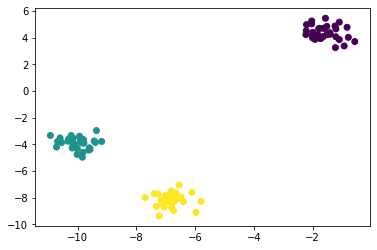

In [ ]:
# Load library
import matplotlib.pyplot as plt
# View scatterplot
plt.scatter(features[:,0], features[:,1], c=target)
plt.show()

**Problem**
You need to import a comma-separated values (CSV) file.

**Solution**
Use the pandas library’s read_csv to load a local or hosted CSV file:

In [ ]:
# Load library
import pandas as pd

# Create URL
url = titanic

# Load dataset
dataframe = pd.read_csv(url)

# View first two rows
dataframe.head(2)

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1
1,"Allison, Miss Helen Loraine",1st,2.0,female,0


**Problem**
You need to import an Excel spreadsheet.

**Solution**
Use the pandas library’s read_excel to load an Excel spreadsheet:

In [ ]:
# Load library
import pandas as pd
# Create URL
url = simulated_excel

# Load data
dataframe = pd.read_excel(url, sheetname=0, header=1)

# View the first two rows
dataframe.head(2)

TypeError: ignored

**Problem**
You need to load a JSON file for data preprocessing.

**Solution**
The pandas library provides read_json to convert a JSON file into a pandas object:

In [ ]:
# Load library
import pandas as pd
# Create URL
url = simulated_json

# Load data
dataframe = pd.read_json(url, orient='columns')

# View the first two rows
dataframe.head(2)

# The key difference is the orient parameter, which indicates to pandas how the JSON file
# is structured. However, it might take some experimenting to figure out which argument (split, records, index, columns, and values) is the right one. Another helpful
# tool pandas offers is json_normalize, which can help convert semistructured JSON data into a pandas DataFrame.

HTTPError: ignored

**Problem**
You need to load data from a database using the structured query language (SQL).

**Solution**
pandas’ read_sql_query allows us to make a SQL query to a database and load it:

In [ ]:
# Load libraries
import pandas as pd
from sqlalchemy import create_engine
# Create a connection to the database
database_connection = create_engine('sqlite:///sample.db')
# Load data
dataframe = pd.read_sql_query('SELECT * FROM data', database_connection)
# View first two rows
dataframe.head(2)

#  In this recipe we first use create_engine to define a connection to a SQL database engine called SQLite.
# Next we use pandas’ read_sql_query to query that database using SQL and put the results in a DataFrame.

#SQL is a language in its own right and, while beyond the scope of this book, it is certainly worth knowing for anyone wanting to learn machine learning. 
#Our SQL query, SELECT * FROM data, asks the database to give us all columns (*) from the table called data

OperationalError: ignored

# **Data Wrangling**
Data wrangling is a broad term used, often informally, to describe the process of
transforming raw data to a clean and organized format ready for use. For us, data
wrangling is only one step in preprocessing our data, but it is an important step.
The most common data structure used to “wrangle” data is the data frame, which can
be both intuitive and incredibly versatile. Data frames are tabular, meaning that they
are based on rows and columns like you would see in a spreadsheet. 

In [ ]:
# Here is a data frame created from data about passengers on the Titanic:

# Load library
import pandas as pd
# Create URL

# Load data as a dataframe
dataframe = pd.read_csv(url)
# Show first 5 rows
dataframe.head(5)

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1


There are three important things to notice in this data frame.

First, in a data frame each row corresponds to one observation (e.g., a passenger) and
each column corresponds to one feature (gender, age, etc.). For example, by looking
at the first observation we can see that Miss Elisabeth Walton Allen stayed in first
class, was 29 years old, was female, and survived the disaster.

Second, each column contains a name (e.g., Name, PClass, Age) and each row contains
an index number (e.g., 0 for the lucky Miss Elisabeth Walton Allen). We will use these
to select and manipulate observations and features.

Third, two columns, Sex and SexCode, contain the same information in different for‐
mats. In Sex, a woman is indicated by the string female, while in SexCode, a woman
is indicated by using the integer 1. We will want all our features to be unique, and
therefore we will need to remove one of these columns.

Now, we will cover a wide variety of techniques to manipulate data frames
using the pandas library with the goal of creating a clean, well-structured set of obser‐
vations for further preprocessing.

**Problem**
You want to create a new data frame.

**Solution**
pandas has many methods of creating a new DataFrame object.

 One easy method is
to create an empty data frame using DataFrame and then define each column separately:

In [ ]:
# Load library
import pandas as pd

# Create DataFrame
dataframe = pd.DataFrame()

# Add columns
dataframe['Name'] = ['Jacky Jackson', 'Steven Stevenson']
dataframe['Age'] = [38, 25]
dataframe['Driver'] = [True, False]

# Show DataFrame
dataframe

,Name,Age,Driver
0,Jacky Jackson,38,True
1,Steven Stevenson,25,False


In [ ]:
# Alternatively, once we have created a DataFrame object, we can append new rows to the bottom:

# Create row
new_person = pd.Series(['Molly Mooney', 40, True], index=['Name','Age','Driver'])
# Append row
dataframe.append(new_person, ignore_index=True)

,Name,Age,Driver
0,Jacky Jackson,38,True
1,Steven Stevenson,25,False
2,Molly Mooney,40,True


In
the real world, creating an empty DataFrame and then populating it will almost never
happen. Instead, our DataFrames will be created from real data we have loading from
other sources (e.g., a CSV file or database).

**Problem**
You want to view some characteristics of a DataFrame.

**Solution**
One of the easiest things we can do after loading the data is view the first few rows
using head:

In [ ]:
# Load library
import pandas as pd
# Create URL
url=titanic
# Load data
dataframe = pd.read_csv(url )
# Show two rows
dataframe.head(2)

# We can also take a look at the number of rows and columns:
# Show dimensions
dataframe.shape

# Additionally, we can get descriptive statistics for any numeric columns using describe:

# Show statistics
dataframe.describe()

,Age,Survived
count,756.000000,1313.000000
mean,30.397989,0.342727
std,14.259049,0.474802
min,0.170000,0.000000
25%,21.000000,0.000000
50%,28.000000,0.000000
75%,39.000000,1.000000
max,71.000000,1.000000


After we load some data, it is a good idea to understand how it is structured and what
kind of information it contains. Ideally, we would view the full data directly. But with
most real-world cases, the data could have thousands to hundreds of thousands to
millions of rows and columns. Instead, we have to rely on pulling samples to view
small slices and calculating summary statistics of the data.
In our solution, we are using a toy dataset of the passengers of the Titanic on her last
voyage. Using head we can take a look at the first few rows (five by default) of the
data. Alternatively, we can use tail to view the last few rows. With shape we can see
how many rows and columns our DataFrame contains. And finally, with describe we
can see some basic descriptive statistics for any numerical column.
It is worth noting that summary statistics do not always tell the full story. For exam‐
ple, pandas treats the columns Survived and SexCode as numeric columns because
they contain 1s and 0s. However, in this case the numerical values represent cate‐
gories. For example, if Survived equals 1, it indicates that the passenger survived the
disaster. For this reason, some of the summary statistics provided don’t make sense, such as the standard deviation of the SexCode column (an indicator of the passenger’s
gender).

**Problem**
You need to select individual data or slices of a DataFrame.

**Solution**
Use loc or iloc to select one or more rows or values:

In [ ]:
# Load library
import pandas as pd

# Select first row
dataframe.iloc[0]

#We can use : to define a slice of rows we want, such as selecting the second, third, and fourth rows:

# Select three rows
dataframe.iloc[1:4]

# We can even use it to get all rows up to a point, such as all rows up to and including the fourth row:

# Select three rows
dataframe.iloc[:4]

# DataFrames do not need to be numerically indexed. We can set the index of a DataFrame to any value where the value is unique to each row. For example, we can set the
#index to be passenger names and then select rows using a name:

# Set index
dataframe = dataframe.set_index(dataframe['Name'])
# Show row
dataframe.loc['Allen, Miss Elisabeth Walton']

# All rows in a pandas DataFrame have a unique index value. By default, this index is an integer indicating the row position in the DataFrame; however, it does not have to be. 
# DataFrame indexes can be set to be unique alphanumeric strings or customer numbers. To select individual rows and slices of rows, pandas provides two methods:
# • loc is useful when the index of the DataFrame is a label (e.g., a string).
# • iloc works by looking for the position in the DataFrame. For example, iloc[0]
# will return the first row regardless of whether the index is an integer or a label.
# It is useful to be comfortable with both loc and iloc since they will come up a lot during data cleaning.

Name        Allen, Miss Elisabeth Walton
PClass                               1st
Age                                 29.0
Sex                               female
Survived                               1
Name: Allen, Miss Elisabeth Walton, dtype: object

**Problem**
You want to select DataFrame rows based on some condition.

**Solution**
This can be easily done in pandas. For example, if we wanted to select all the women on the Titanic:

In [ ]:
# Load library
import pandas as pd
# Create URL
url=titanic
# Load data
dataframe = pd.read_csv(url)
# Show top two rows where column 'sex' is 'female'
dataframe[dataframe['Sex'] == 'female'].head(2)

# Filter rows
dataframe[(dataframe['Sex'] == 'female') & (dataframe['Age'] >= 65)]

# Conditionally selecting and filtering data is one of the most common tasks in data wrangling. 


,Name,PClass,Age,Sex,Survived
73,"Crosby, Mrs Edward Gifford (Catherine Elizabet...",1st,69.0,female,1


**Problem**
You need to replace values in a DataFrame.

**Solution**
pandas’ replace is an easy way to find and replace values

In [ ]:
# Load library
import pandas as pd
# Create URL
url=titanic
# Load data
dataframe = pd.read_csv(url)

# Replace values, show two rows
dataframe['Sex'].replace("female", "Woman").head(2)

# Replace "female" and "male with "Woman" and "Man"
dataframe['Sex'].replace(["female", "male"], ["Woman", "Man"]).head(5)

# Replace values, show two rows
dataframe.replace(1, "One").head(2)

# Replace values, show two rows
dataframe.replace(r"1st", "First", regex=True).head(2)

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",First,29.0,female,1
1,"Allison, Miss Helen Loraine",First,2.0,female,0


**Problem**
You want to rename a column in a pandas DataFrame.

**Solution**
Rename columns using the rename method:

In [ ]:
# Load library
import pandas as pd
# Create URL
url=titanic
# Load data
dataframe = pd.read_csv(url)
# Rename column, show two rows
dataframe.rename(columns={'PClass': 'Passenger Class'}).head(2)

# Rename columns, show two rows
dataframe.rename(columns={'PClass': 'Passenger Class', 'Sex': 'Gender'}).head(2)

,Name,Passenger Class,Age,Gender,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1
1,"Allison, Miss Helen Loraine",1st,2.0,female,0


In [ ]:
#If we want to rename all columns at once, this helpful snippet of code creates a dictionary with the old column names as keys and empty strings as values:

# Load library
import collections
# Create dictionary
column_names = collections.defaultdict(str)
# Create keys
for name in dataframe.columns:
 column_names[name]


# Show dictionary
column_names

defaultdict(str,
            {'Age': '', 'Name': '', 'PClass': '', 'Sex': '', 'Survived': ''})

**Problem**
You want to find the min, max, sum, average, or count of a numeric column.

**Solution**
pandas comes with some built-in methods for commonly used descriptive statistics:

In [ ]:
# Load library
import pandas as pd
# Create URL
url=titanic
# Load data
dataframe = pd.read_csv(url)
# Calculate statistics
print('Maximum:', dataframe['Age'].max())
print('Minimum:', dataframe['Age'].min())
print('Mean:', dataframe['Age'].mean())
print('Sum:', dataframe['Age'].sum())
print('Count:', dataframe['Age'].count())

Maximum: 71.0
Minimum: 0.17
Mean: 30.397989417989415
Sum: 22980.88
Count: 756


In [ ]:
#In addition to the statistics used in the solution, pandas offers 
#variance (var), standard deviation (std), kurtosis (kurt), skewness (skew), 
#standard error of the mean (sem), mode (mode), median (median), and a number of others.
#Furthermore, we can also apply these methods to the whole DataFrame:

# Show counts
dataframe.count()

Name        1313
PClass      1312
Age          756
Sex         1313
Survived    1313
dtype: int64

**Problem**
You want to select all unique values in a column.

**Solution**
Use unique to view an array of all unique values in a column:

In [ ]:
# Load library
import pandas as pd
# Create URL
url=titanic
# Load data
dataframe = pd.read_csv(url)
# Select unique values
dataframe['Sex'].unique()

# Alternatively, value_counts will display all unique values with the number of times each value appears:

# Show counts
dataframe['Sex'].value_counts()

male      851
female    462
Name: Sex, dtype: int64

Both unique and value_counts are useful for manipulating and exploring categorical
columns. Very often in categorical columns there will be classes that need to be handled in the data wrangling phase. 

In [ ]:
# For example, in the Titanic dataset, PClass is a column indicating the class of a passenger’s ticket. 
# There were three classes on the Titanic; however, if we use value_counts we can see a problem:

# Show counts
dataframe['PClass'].value_counts()

#for now just realize that “extra” classes are common in categorical data and should not be ignored.

#v Finally, if we simply want to count the number of unique values, we can use nunique:

# Show number of unique values
dataframe['PClass'].nunique()

3

**Problem**
You want to select missing values in a DataFrame.

**Solution**
isnull and notnull return booleans indicating whether a value is missing:

In [ ]:
# Load library
import pandas as pd
# Create URL
url=titanic
# Load data
dataframe = pd.read_csv(url)
## Select missing values, show two rows
dataframe[dataframe['Age'].isnull()].head(2)

#Missing values are a ubiquitous problem in data wrangling, yet many underestimate
#the difficulty of working with missing data. pandas uses NumPy’s NaN (“Not A Number”) value to denote missing values, 
#but it is important to note that NaN is not fully implemented natively in pandas. 
# For example, if we wanted to replace all strings containing male with missing values, we return an error:

# Attempt to replace values with NaN
dataframe['Sex'] = dataframe['Sex'].replace('male', 'NaN')



In [ ]:
#To have full functionality with NaN we need to import the NumPy library first:

# Load library
import numpy as np
# Replace values with NaN
dataframe['Sex'] = dataframe['Sex'].replace('male', np.nan)

# Load data, set missing values
dataframe = pd.read_csv(url, na_values=[np.nan, 'NONE', -999])

**Problem**
You want to delete a column from your DataFrame.

**Solution**
The best way to delete a column is to use drop with the parameter axis=1 (i.e., the
column axis):

In [ ]:
# Load library
import pandas as pd
# Create URL
url = titanic
# Load data
dataframe = pd.read_csv(url)
# Delete column
dataframe.drop('Age', axis=1).head(2)

,Name,PClass,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,female,1
1,"Allison, Miss Helen Loraine",1st,female,0


In [ ]:
# Drop columns
dataframe.drop(['Age', 'Sex'], axis=1).head(2)

,Name,PClass,Survived
0,"Allen, Miss Elisabeth Walton",1st,1
1,"Allison, Miss Helen Loraine",1st,0


In [ ]:
# If a column does not have a name (which can sometimes happen), you can drop it by its column index using dataframe.columns:
# Drop column
dataframe.drop(dataframe.columns[1], axis=1).head(2)

,Name,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",29.0,female,1
1,"Allison, Miss Helen Loraine",2.0,female,0


**Discussion**

drop is the idiomatic method of deleting a column. An alternative method is del
dataframe['Age'], which works most of the time but is not recommended because
of how it is called within pandas (the details of which are outside the scope of this
book).
One habit I recommend learning is to never use pandas’ inplace=True argument.
Many pandas methods include an inplace parameter, which when True edits the
DataFrame directly. This can lead to problems in more complex data processing pipe‐
lines because we are treating the DataFrames as mutable objects (which they techni‐
cally are). I recommend treating DataFrames as immutable objects. For example:

```
# Create a new DataFrame
dataframe_name_dropped = dataframe.drop(dataframe.columns[0], axis=1)
```


In this example, we are not mutating the DataFrame dataframe but instead are mak‐
ing a new DataFrame that is an altered version of dataframe called data
frame_name_dropped. If you treat your DataFrames as immutable objects, you will
save yourself a lot of headaches down the road.

**Problem**
You want to delete one or more rows from a DataFrame.

**Solution**
Use a boolean condition to create a new DataFrame excluding the rows you want to
delete:

In [ ]:
# Load library
import pandas as pd
# Create URL
url = titanic
# Load data
dataframe = pd.read_csv(url)
# Delete rows, show first two rows of output
dataframe[dataframe['Sex'] != 'male'].head(2)



,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1
1,"Allison, Miss Helen Loraine",1st,2.0,female,0


In [ ]:
#We can use boolean conditions to easily delete single rows by matching a unique value:

# Delete row, show first two rows of output
dataframe[dataframe['Name'] != 'Allison, Miss Helen Loraine'].head(2)

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.0,male,0


In [ ]:
# And we can even use it to delete a single row by row index:

# Delete row, show first two rows of output
dataframe[dataframe.index != 0].head(2)

,Name,PClass,Age,Sex,Survived
1,"Allison, Miss Helen Loraine",1st,2.0,female,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.0,male,0


**Problem**
You want to drop duplicate rows from your DataFrame.

**Solution**
Use drop_duplicates, but be mindful of the parameters:

In [ ]:
# Load library
import pandas as pd
# Create URL
url = titanic
# Load data
dataframe = pd.read_csv(url)
# Drop duplicates, show first two rows of output
dataframe.drop_duplicates().head(2)

# Show number of rows
print("Number Of Rows In The Original DataFrame:", len(dataframe))
print("Number Of Rows After Deduping:", len(dataframe.drop_duplicates()))

Number Of Rows In The Original DataFrame: 1313
Number Of Rows After Deduping: 1313


**Discussion**

A keen reader will notice that the solution didn’t actually drop any row.
The reason is because drop_duplicates defaults to only dropping rows that match
perfectly across all columns. Under this condition, every row in our DataFrame, data
frame, is actually unique. However, often we want to consider only a subset of col‐
umns to check for duplicate rows. We can accomplish this using the subset parameter

In [ ]:
# Drop duplicates
dataframe.drop_duplicates(subset=['Sex'])

# Take a close look at the preceding output: we told drop_duplicates to only consider
#any two rows with the same value for Sex to be duplicates and to drop them. Now we
#are left with a DataFrame of only two rows: one man and one woman. You might be
#asking why drop_duplicates decided to keep these two rows instead of two different rows. 
# The answer is that drop_duplicates defaults to keeping the first occurrence of
# a duplicated row and dropping the rest. We can control this behavior using the keep parameter:

# Drop duplicates
dataframe.drop_duplicates(subset=['Sex'], keep='last')

,Name,PClass,Age,Sex,Survived
1307,"Zabour, Miss Tamini",3rd,NaN,female,0
1312,"Zimmerman, Leo",3rd,29.0,male,0


**Problem**
You want to group individual rows according to some shared value.

**Solution**
groupby is one of the most powerful features in pandas:

In [ ]:
# Load library
import pandas as pd
# Create URL
url = titanic
# Load data
dataframe = pd.read_csv(url)
# Group rows by the values of the column 'Sex', calculate mean
# of each group
dataframe.groupby('Sex').mean()

#

,Age,Survived
Sex,,
female,29.396424,0.666667
male,31.014338,0.166863


**Discussion**

groupby is where data wrangling really starts to take shape. It is very common to have
a DataFrame where each row is a person or an event and we want to group them
according to some criterion and then calculate a statistic. For example, you can imagine a DataFrame where each row is an individual sale at a national restaurant chain
and we want the total sales per restaurant. We can accomplish this by grouping rows
by individual resturants and then calculating the sum of each group.

In [ ]:
# we need to group by something and then apply a function to each of those groups:
# Group rows, count rows
dataframe.groupby('Survived')['Name'].count()

Survived
0    863
1    450
Name: Name, dtype: int64

In [ ]:
# We can also group by a first column, then group that grouping by a second column:
# Group rows, calculate mean
dataframe.groupby(['Sex','Survived'])['Age'].mean()

Sex     Survived
female  0           24.901408
        1           30.867143
male    0           32.320780
        1           25.951875
Name: Age, dtype: float64

**Problem**
You need to group individual rows by time periods.

**Solution**
Use resample to group rows by chunks of time:

In [ ]:
# Load libraries
import pandas as pd
import numpy as np
# Create date range
time_index = pd.date_range('06/06/2017', periods=100000, freq='30S')
# Create DataFrame
dataframe = pd.DataFrame(index=time_index)
# Create column of random values
dataframe['Sale_Amount'] = np.random.randint(1, 10, 100000)
# Group rows by week, calculate sum per week
dataframe.resample('W').sum()

,Sale_Amount
2017-06-11,86256
2017-06-18,100757
2017-06-25,100945
2017-07-02,100171
2017-07-09,101411
2017-07-16,10494


**Problem**
You want to iterate over every element in a column and apply some action.

**Solution**
You can treat a pandas column like any other sequence in Python:

In [ ]:
# Load library
import pandas as pd
# Create URL
url = titanic
# Load data
dataframe = pd.read_csv(url)
# Print first two names uppercased
for name in dataframe['Name'][0:2]:
 print(name.upper())

ALLEN, MISS ELISABETH WALTON
ALLISON, MISS HELEN LORAINE


In [ ]:
# use list comprehensions:

# Show first two names uppercased
[name.upper() for name in dataframe['Name'][0:2]]

['ALLEN, MISS ELISABETH WALTON', 'ALLISON, MISS HELEN LORAINE']

**Applying a Function Over All Elements in a Column**

**Problem**
You want to apply some function over all elements in a column.

**Solution**
Use apply to apply a built-in or custom function on every element in a column:

In [ ]:
# Load library
import pandas as pd
# Create URL
url = titanic
# Load data
dataframe = pd.read_csv(url)
# Create function
def uppercase(x):
 return x.upper()
# Apply function, show two rows
dataframe['Name'].apply(uppercase)[0:2]

0    ALLEN, MISS ELISABETH WALTON
1     ALLISON, MISS HELEN LORAINE
Name: Name, dtype: object

**Discussion**

apply is a great way to do data cleaning and wrangling. It is common to write a function to perform some useful operation (separate first and last names, convert strings
to floats, etc.) and then map that function to every element in a column.

**Applying a Function to Groups**

**Problem**
You have grouped rows using groupby and want to apply a function to each group.

**Solution**
Combine groupby and apply:

In [ ]:
# Load library
import pandas as pd
# Create URL
url = titanic
# Load data
dataframe = pd.read_csv(url)
# Group rows, apply function to groups
dataframe.groupby('Sex').apply(lambda x: x.count())

,Name,PClass,Age,Sex,Survived
Sex,,,,,
female,462,462,288,462,462
male,851,850,468,851,851


**Discussion**

By combining groupby and apply we can calculate cus‐
tom statistics or apply any function to each group separately

**Problem**
You want to concatenate two DataFrames.

**Solution**
Use concat with axis=0 to concatenate along the row axis:

In [ ]:
# Load library
import pandas as pd
# Create DataFrame
data_a = {'id': ['1', '2', '3'],
 'first': ['Alex', 'Amy', 'Allen'],
 'last': ['Anderson', 'Ackerman', 'Ali']}
dataframe_a = pd.DataFrame(data_a, columns = ['id', 'first', 'last'])
# Create DataFrame
data_b = {'id': ['4', '5', '6'],
 'first': ['Billy', 'Brian', 'Bran'],
 'last': ['Bonder', 'Black', 'Balwner']}
dataframe_b = pd.DataFrame(data_b, columns = ['id', 'first', 'last'])
# Concatenate DataFrames by rows
pd.concat([dataframe_a, dataframe_b], axis=0)

# You can use axis=1 to concatenate along the column axis:
# Concatenate DataFrames by columns
pd.concat([dataframe_a, dataframe_b], axis=1)

,id,first,last,id,first,last
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner


In [ ]:
#Alternatively we can use append to add a new row to a DataFrame:

# Create row
row = pd.Series([10, 'Chris', 'Chillon'], index=['id', 'first', 'last'])
# Append row
dataframe_a.append(row, ignore_index=True)

,id,first,last
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,10,Chris,Chillon


**Problem**
You want to merge two DataFrames.

**Solution**
To inner join, use merge with the on parameter to specify the column to merge on:

In [ ]:
# Load library
import pandas as pd
# Create DataFrame
employee_data = {'employee_id': ['1', '2', '3', '4'],
 'name': ['Amy Jones', 'Allen Keys', 'Alice Bees',
 'Tim Horton']}
dataframe_employees = pd.DataFrame(employee_data, columns = ['employee_id',
 'name'])
# Create DataFrame
sales_data = {'employee_id': ['3', '4', '5', '6'],
 'total_sales': [23456, 2512, 2345, 1455]}
dataframe_sales = pd.DataFrame(sales_data, columns = ['employee_id',
 'total_sales'])
# Merge DataFrames
pd.merge(dataframe_employees, dataframe_sales, on='employee_id')

,employee_id,name,total_sales
0,3,Alice Bees,23456
1,4,Tim Horton,2512


In [ ]:
# merge defaults to inner joins. If we want to do an outer join, we can specify that with the how parameter:

# Merge DataFrames
pd.merge(dataframe_employees, dataframe_sales, on='employee_id', how='outer')

,employee_id,name,total_sales
0,1,Amy Jones,NaN
1,2,Allen Keys,NaN
2,3,Alice Bees,23456.0
3,4,Tim Horton,2512.0
4,5,NaN,2345.0
5,6,NaN,1455.0


In [ ]:
# The same parameter can be used to specify left and right joins:

# Merge DataFrames
pd.merge(dataframe_employees, dataframe_sales, on='employee_id', how='left')

,employee_id,name,total_sales
0,1,Amy Jones,NaN
1,2,Allen Keys,NaN
2,3,Alice Bees,23456.0
3,4,Tim Horton,2512.0


In [ ]:
# We can also specify the column name in each DataFrame to merge on:

# Merge DataFrames
pd.merge(dataframe_employees,
 dataframe_sales,
 left_on='employee_id',
 right_on='employee_id')

# If instead of merging on two columns we want to merge on the indexes of each Datarame, 
# we can replace the left_on and right_on parameters with right_index=True and left_index=True.

,employee_id,name,total_sales
0,3,Alice Bees,23456
1,4,Tim Horton,2512


**Discussion**

Oftentimes, the data we need to use is complex; it doesn’t always come in one piece.
Instead in the real world, we’re usually faced with disparate datasets, from multiple
database queries or files. To get all that data into one place, we can load each data
query or data file into pandas as individual DataFrames and then merge them
together into a single DataFrame.

This process might be familiar to anyone who has used SQL, a popular language for
doing merging operations (called joins). While the exact parameters used by pandas
will be different, they follow the same general patterns used by other software lan‐
guages and tools.
There are three aspects to specify with any merge operation. First, we have to specify
the two DataFrames we want to merge together. In the solution we named them data
frame_employees and dataframe_sales. Second, we have to specify the name(s) of
the columns to merge on—that is, the columns whose values are shared between the
two DataFrames. For example, in our solution both DataFrames have a column
named employee_id. To merge the two DataFrames we will match up the values in
each DataFrame’s employee_id column with each other. If these two columns use the
same name, we can use the on parameter. However, if they have different names we
can use left_on and right_on.

What is the left and right DataFrame? The simple answer is that the left DataFrame is
the first one we specified in merge and the right DataFrame is the second one. This
language comes up again in the next sets of parameters we will need.
The last aspect, and most difficult for some people to grasp, is the type of merge oper‐
ation we want to conduct. This is specified by the how parameter. merge supports the
four main types of joins:

*Inner*

Return only the rows that match in both DataFrames (e.g., return any row with
an employee_id value appearing in both dataframe_employees and data
frame_sales).

*Outer*

Return all rows in both DataFrames. If a row exists in one DataFrame but not in
the other DataFrame, fill NaN values for the missing values (e.g., return all rows
in both employee_id and dataframe_sales).

*Left*

Return all rows from the left DataFrame but only rows from the right DataFrame
that matched with the left DataFrame. Fill NaN values for the missing values (e.g.,
return all rows from dataframe_employees but only rows from data
frame_sales that have a value for employee_id that appears in data
frame_employees).

*Right*

Return all rows from the right DataFrame but only rows from the left DataFrame
that matched with the right DataFrame. Fill NaN values for the missing values
(e.g., return all rows from dataframe_sales but only rows from dataframe_employees that have a value for employee_id that appears in data
frame_sales).

# **Handling Numerical Data**


**Rescaling** 

is a common preprocessing task in machine learning. Many of the algorithms described later in this book will assume all features are on the same scale, typically 0 to 1 or –1 to 1. 

There are a number of rescaling techniques, but one of the
simplest is called min-max scaling. Min-max scaling uses the minimum and maximum values of a feature to rescale values to within a range. Specifically, min-max calculates:

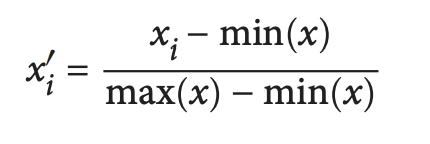

where x is the feature vector, x’i
 is an individual element of feature x, and x’i
 is the rescaled element. In our example, we can see from the outputted array that the feature has been successfully rescaled to between 0 and 1:

scikit-learn’s MinMaxScaler offers two options to rescale a feature. One option is to
use fit to calculate the minimum and maximum values of the feature, then use trans
form to rescale the feature. The second option is to use fit_transform to do both
operations at once. There is no mathematical difference between the two options, but
there is sometimes a practical benefit to keeping the operations separate because it
allows us to apply the same transformation to different sets of the data.

**Standardizing a Feature** 

A common alternative to min-max scaling  is rescaling of fea‐
tures to be approximately standard normally distributed. To achieve this, we use
standardization to transform the data such that it has a mean, x̄, of 0 and a standard
deviation, σ, of 1. Specifically, each element in the feature is transformed so that:
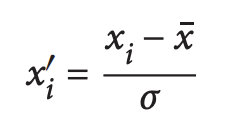


where x’i
 is our standardized form of xi
. The transformed feature represents the num‐
ber of standard deviations the original value is away from the feature’s mean value
(also called a z-score in statistics).
Standardization is a common go-to scaling method for machine learning preprocessing and in my experience is used more than min-max scaling. However, it depends on
the learning algorithm. For example, principal component analysis often works better
using standardization, while min-max scaling is often recommended for neural networks (both algorithms are discussed later in this book). As a general rule, I’d recommend defaulting to standardization unless you have a specific reason to use an alternative.

**Normalizing Observations**

Many rescaling methods (e.g., min-max scaling and standardization) operate on features; however, we can also rescale across individual observations. Normalizer
rescales the values on individual observations to have unit norm (the sum of their
lengths is 1). This type of rescaling is often used when we have many equivalent features (e.g., text classification when every word or n-word group is a feature).
Normalizer provides three norm options with Euclidean norm (often called L2)
being the default argument:

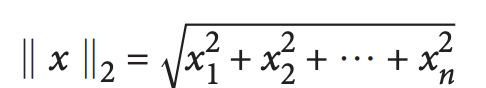

where x is an individual observation and xn is that observation’s value for the nth feature.


Alternatively, we can specify Manhattan norm (L1):

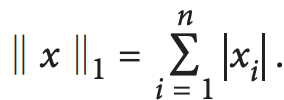



**Generating Polynomial and Interaction Features**
Polynomial features are often created when we want to include the notion that there
exists a nonlinear relationship between the features and the target. For example, we
might suspect that the effect of age on the probability of having a major medical con‐
dition is not constant over time but increases as age increases. We can encode that
nonconstant effect in a feature, x, by generating that feature’s higher-order forms (x^2,x^3, etc.).

Additionally, often we run into situations where the effect of one feature is dependent
on another feature. A simple example would be if we were trying to predict whether
or not our coffee was sweet and we had two features: 1) whether or not the coffee was
stirred and 2) if we added sugar. Individually, each feature does not predict coffee
sweetness, but the combination of their effects does. That is, a coffee would only be
sweet if the coffee had sugar and was stirred. The effects of each feature on the target
(sweetness) are dependent on each other. We can encode that relationship by including an interaction feature that is the product of the individual features.

**Transforming Features**

It is common to want to make some custom transformations to one or more features.
For example, we might want to create a feature that is the natural log of the values of
the different feature. We can do this by creating a function and then mapping it to
features using either scikit-learn’s FunctionTransformer or pandas’ apply. In the solution we created a very simple function, add_ten, which added 10 to each input, but
there is no reason we could not define a much more complex function.

**Detecting Outliers**

There is no single best technique for detecting outliers. Instead, we have a collection
of techniques all with their own advantages and disadvantages. Our best strategy is
often trying multiple techniques (e.g., both EllipticEnvelope and IQR-based detec‐
tion) and looking at the results as a whole.
If at all possible, we should take a look at observations we detect as outliers and try to
understand them. For example, if we have a dataset of houses and one feature is number of rooms, is an outlier with 100 rooms really a house or is it actually a hotel that
has been misclassified?

__________________________________


**Problem**
You need to **rescale** the values of a numerical feature to be between two values.

**Solution**
Use scikit-learn’s MinMaxScaler to rescale a feature array:

In [ ]:
# Load libraries
import numpy as np
from sklearn import preprocessing
# Create feature
feature = np.array([[-500.5],
 [-100.1],
 [0],
 [100.1],
 [900.9]])
# Create scaler
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))

# Scale feature
scaled_feature = minmax_scale.fit_transform(feature)
# Show feature
scaled_feature

array([[0.        ],
       [0.28571429],
       [0.35714286],
       [0.42857143],
       [1.        ]])

**Problem**
You want to **transform a feature** to have a mean of 0 and a standard deviation of 1.

**Solution**
scikit-learn’s StandardScaler performs both transformations:

In [ ]:
# Load libraries
import numpy as np
from sklearn import preprocessing
# Create feature
x = np.array([[-1000.1],
 [-200.2],
 [500.5],
 [600.6],
 [9000.9]])
# Create scaler
scaler = preprocessing.StandardScaler()
# Transform the feature
standardized = scaler.fit_transform(x)
# Show feature
standardized

array([[-0.76058269],
       [-0.54177196],
       [-0.35009716],
       [-0.32271504],
       [ 1.97516685]])

In [ ]:
#We can see the effect of standardization by looking at the mean and standard deviation of our solution’s output:

# Print mean and standard deviation
print("Mean:", round(standardized.mean()))
print("Standard deviation:", standardized.std())

Mean: 0
Standard deviation: 1.0


In [ ]:
#If our data has significant outliers, it can negatively impact our standardization by affecting the feature’s mean and variance. 
#In this scenario, it is often helpful to instead rescale the feature using the median and quartile range. 

#In scikit-learn, we do this using the RobustScaler method:

# Create scaler
robust_scaler = preprocessing.RobustScaler()
# Transform feature
robust_scaler.fit_transform(x)

array([[-1.87387612],
       [-0.875     ],
       [ 0.        ],
       [ 0.125     ],
       [10.61488511]])

**Problem**
You want to rescale the feature values of observations to have unit norm (a total
length of 1).


**Solution**
Use Normalizer with a norm argument:

In [ ]:
# Load libraries
import numpy as np
from sklearn.preprocessing import Normalizer
# Create feature matrix
features = np.array([[0.5, 0.5],
 [1.1, 3.4],
 [1.5, 20.2],
 [1.63, 34.4],
 [10.9, 3.3]])
# Create normalizer
normalizer = Normalizer(norm="l2")
# Transform feature matrix
normalizer.transform(features)

array([[0.70710678, 0.70710678],
       [0.30782029, 0.95144452],
       [0.07405353, 0.99725427],
       [0.04733062, 0.99887928],
       [0.95709822, 0.28976368]])

In [ ]:
# Transform feature matrix
features_l2_norm = Normalizer(norm="l2").transform(features)
# Show feature matrix
features_l2_norm

array([[0.70710678, 0.70710678],
       [0.30782029, 0.95144452],
       [0.07405353, 0.99725427],
       [0.04733062, 0.99887928],
       [0.95709822, 0.28976368]])

In [ ]:
# Transform feature matrix
features_l1_norm = Normalizer(norm="l1").transform(features)
# Show feature matrix
features_l1_norm



array([[0.5       , 0.5       ],
       [0.24444444, 0.75555556],
       [0.06912442, 0.93087558],
       [0.04524008, 0.95475992],
       [0.76760563, 0.23239437]])

In [ ]:
# Intuitively, L2 norm can be thought of as the distance between two points in New
# York for a bird (i.e., a straight line), while L1 can be thought of as the distance for a
# human walking on the street (walk north one block, east one block, north one block,
# east one block, etc.), which is why it is called “Manhattan norm” or “Taxicab norm.”
# Practically, notice that norm='l1' rescales an observation’s values so they sum to 1,
# which can sometimes be a desirable quality:

# Print sum
print("Sum of the first observation\'s values:",
 features_l1_norm[0, 0] + features_l1_norm[0, 1])

Sum of the first observation's values: 1.0


**Problem**
You want to create polynominal and interaction features.


**Solution**
Even though some choose to create polynomial and interaction features manually,
scikit-learn offers a built-in method:


In [ ]:
# Load libraries
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
# Create feature matrix
features = np.array([[2, 3],
 [2, 3],[2, 3]])

# Create PolynomialFeatures object
polynomial_interaction = PolynomialFeatures(degree=2, include_bias=False)
# Create polynomial features
polynomial_interaction.fit_transform(features)

# The degree parameter determines the maximum degree of the polynomial. 

array([[2., 3., 4., 6., 9.],
       [2., 3., 4., 6., 9.],
       [2., 3., 4., 6., 9.]])

In [ ]:
#Furthermore, by default PolynomialFeatures includes interaction features:
#x^1x^2
#We can restrict the features created to only interaction features by setting interaction_only to True:

interaction = PolynomialFeatures(degree=2,
interaction_only=True, include_bias=False)
interaction.fit_transform(features)

array([[2., 3., 6.],
       [2., 3., 6.],
       [2., 3., 6.]])

**Problem**
You want to make a custom **transformation to one or more features**.

**Solution**
In scikit-learn, use FunctionTransformer to apply a function to a set of features:

In [ ]:
# Load libraries
import numpy as np
from sklearn.preprocessing import FunctionTransformer
# Create feature matrix
features = np.array([[2, 3],
 [2, 3],
 [2, 3]])
# Define a simple function
def add_ten(x):
 return x + 10
# Create transformer
ten_transformer = FunctionTransformer(add_ten)
# Transform feature matrix
ten_transformer.transform(features)

array([[12, 13],
       [12, 13],
       [12, 13]])

In [ ]:
#We can create the same transformation in pandas using apply:

# Load library
import pandas as pd
# Create DataFrame
df = pd.DataFrame(features, columns=["feature_1", "feature_2"])

# Apply function
df.apply(add_ten)

,feature_1,feature_2
0,12,13
1,12,13
2,12,13


**Problem**
You want to identify extreme observations.

**Solution**
Detecting outliers is unfortunately more of an art than a science. However, a common
method is to assume the data is normally distributed and based on that assumption
“draw” an ellipse around the data, classifying any observation inside the ellipse as an
inlier (labeled as 1) and any observation outside the ellipse as an outlier (labeled as -1):

In [ ]:
# Load libraries
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs
# Create simulated data
features, _ = make_blobs(n_samples = 10,
 n_features = 2,
 centers = 1,
 random_state = 1)
# Replace the first observation's values with extreme values
features[0,0] = 10000
features[0,1] = 10000

# Create detector
outlier_detector = EllipticEnvelope(contamination=.1)
# Fit detector
outlier_detector.fit(features)
# Predict outliers
outlier_detector.predict(features)

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

A major limitation of this approach is the need to specify a contamination parameter, which is the proportion of observations that are outliers—a value that we don’t
know. Think of contamination as our estimate of the cleanliness of our data. If we
expect our data to have few outliers, we can set contamination to something small.
However, if we believe that the data is very likely to have outliers, we can set it to a
higher value.
Instead of looking at observations as a whole, we can instead look at individual features and identify extreme values in those features using interquartile range (IQR):


In [ ]:
# Create one feature
feature = features[:,0]
# Create a function to return index of outliers
def indicies_of_outliers(x):
 q1, q3 = np.percentile(x, [25, 75])
 iqr = q3 - q1
 lower_bound = q1 - (iqr * 1.5)
 upper_bound = q3 + (iqr * 1.5)
 return np.where((x > upper_bound) | (x < lower_bound))
# Run function
indicies_of_outliers(feature)

#IQR is the difference between the first and third quartile of a set of data. 
#You can think of IQR as the spread of the bulk of the data, with outliers being observations far
#from the main concentration of data. Outliers are commonly defined as any value 1.5
#IQRs less than the first quartile or 1.5 IQRs greater than the third quartile.

(array([0]),)